<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/vietocr_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git
!pip install -q -r ./Vietnamese-HTR/requirements.txt
%cd Vietnamese-HTR

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 5325, done.
remote: Counting objects: 100% (338/338), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 5325 (delta 167), reused 263 (delta 118), pack-reused 4987
Receiving objects: 100% (5325/5325), 532.92 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (264/264), done.
Checking out files: 100% (4854/4854), done.
     |████████████████████████████████| 705 kB 30.9 MB/s 
     |████████████████████████████████| 409 kB 71.0 MB/s 
     |████████████████████████████████| 280 kB 72.7 MB/s 
     |████████████████████████████████| 141 kB 74.0 MB/s 
     |████████████████████████████████| 5.9 MB 60.5 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but yo

In [2]:
import glob
import json
import time
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import os
import random
random.seed(42)

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer
import cv2
import numpy as np
from PIL import Image, ImageFont, ImageDraw


# Inference

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

# config['weights'] = './weights/transformCopy of erocr.pth'
# config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['weights'] = 'https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
Downloading...
From: https://drive.google.com/uc?id=13327Y1tz1ohsm5YZMyXVMPIOjoOA0OaA
To: /root/.cache/gdown/tmp6bq76dmk/dl
100%|██████████| 152M/152M [00:03<00:00, 38.3MB/s]


In [ ]:
! gdown --id 1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
! unzip  -qq -o sample.zip
! rm sample.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uMVd6EBjY4Q0G2IkU5iMOQ34X0bysm0b
To: /content/sample.zip
100% 306k/306k [00:00<00:00, 108MB/s]


In [3]:
dir = "./Vietnamese-HTR/data/0825_DataSamples_1"
def infer(detector, image_dir, image_extensions):
    times = []
    paths = []
    for ext in image_extensions:
        paths.extend([path for path in Path(image_dir).rglob('*.'+ext)])

    for path in paths:
        img = Image.open(str(path))
        plt.imshow(img)
        start = time.time()
        s = detector.predict(img, return_prob=True)
        end = time.time()
        times.append(end-start)
        print(s)
        plt.show()
    print("Average inference time: ", sum(times)/len(times))

In [ ]:
!git clone https://github.com/LapTQ/handwritten_text_recognition
!pip install -r ./handwritten_text_recognition/requirements.txt
!apt-get install libx11-xcb1

fatal: destination path 'handwritten_text_recognition' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libx11-xcb1 is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-xcb1 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
image_dir = "./test-data/DataCVOCR"
image_extension = "jpg"
for path in Path(image_dir).rglob('*.'+image_extension):
    !python3 ./handwritten_text_recognition/run.py --input {str(path)} --output path/to/folder

2022-07-21 00:29:50.061097: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[INFO] Image is not blurry.
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.7/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.

2022-07-21 00:30:12.070317: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[INFO] Image is not blurry.
[INFO] Proposed corners are not good.
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr

# Prepare the dataset
Very large dataset (594.000 images)
- en_00: 100000
- en_01: 100000
- vi_00: 100000 
- vi_01: 100000 
- Các ảnh có màu giấy (màu nền) khá giống nhau
- meta: 144000 
- random: 50000

Vietnamese Handwritten Address Dataset
- train: 1829
- test: 549

MCOCR2021
- train: 1546
- test: 390

BKAI Scene Text
- train: 
- test: 


## Crawl datasets


Vietnamese Handwritten Address Dataset
- ./Vietnamese-HTR/data

BKAI Scene Text

In [ ]:
! gdown https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
! gdown https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
! gdown https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
! gdown https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
! unzip -qq -o ./vietnamese_original.zip -d ./scenetext_dataset
! unzip -qq -o ./train_imgs.zip -d ./scenetext_dataset
! unzip -qq -o ./train_gt.zip -d ./scenetext_dataset
! unzip -qq -o ./public_test_imgs.zip -d ./scenetext_dataset
! rm ./vietnamese_original.zip
! rm ./train_imgs.zip
! rm ./train_gt.zip
! rm ./public_test_imgs.zip

Downloading...
From: https://drive.google.com/uc?id=1UUQhNvzgpZy7zXBFQp0Qox-BBjunZ0ml
To: /content/vietnamese_original.zip
100% 1.05G/1.05G [00:09<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_Z4zY2Wk7vtxepUhUzttfddkM2b9cap2
To: /content/train_imgs.zip
100% 96.2M/96.2M [00:03<00:00, 29.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AhEwdTOxByNiHLfZcxFm83ZtPivxGJlS
To: /content/train_gt.zip
100% 166k/166k [00:00<00:00, 69.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PLW2eGsMSVXZahZ7GvEz5Kr1uvyLnxbx
To: /content/public_test_imgs.zip
100% 68.2M/68.2M [00:01<00:00, 55.2MB/s]


MCOCR 2021

In [ ]:
! gdown https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
! gdown https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
!unzip -qq -o ./mcocr2021_private_test_data.zip -d ./mc_ocr
!unzip -qq -o ./mcocr2021_public_train_test_data.zip -d ./mc_ocr
!rm mcocr2021_private_test_data.zip
!rm mcocr2021_public_train_test_data.zip

Downloading...
From: https://drive.google.com/uc?id=1FgCnaotis_NKTbgXdviTTDhrM2AvsdTT
To: /content/mcocr2021_public_train_test_data.zip
100% 355M/355M [00:04<00:00, 71.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xL1NHwf00WWJUsPcS4plZEDmTPQqGUsW
To: /content/mcocr2021_private_test_data.zip
100% 89.9M/89.9M [00:01<00:00, 63.1MB/s]


VietOCR 1M

In [ ]:
# ! gdown https://drive.google.com/uc?id=16QcxOt-lDWjZ3AYahljGj0iTTtAJ6VvP
! gdown https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
# ! unzip -qq -o ./ocr_dataset.zip -d ./ocr_dataset
! unzip -qq -o ./data_line.zip -d ./ocr_dataset
# ! rm -rf ./ocr_dataset/InkData_line_processed/
! rm data_line.zip
# ! rm ocr_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=19QU4VnKtgm3gf0Uw_N2QKSquW1SQ5JiE
To: /content/Vietnamese-HTR/data_line.zip
100% 61.2M/61.2M [00:00<00:00, 87.1MB/s]


Test data

In [ ]:
! gdown https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
!unzip  -qq -o ./DataCVOCR-20220720T235132Z-001.zip -d ./test-data
! rm DataCVOCR-20220720T235132Z-001.zip

Downloading...
From: https://drive.google.com/uc?id=16kDWDrNOxUmG1hNkE24fJ1fra8Pr_Jj-
To: /content/DataCVOCR-20220720T235132Z-001.zip
100% 81.8M/81.8M [00:01<00:00, 56.5MB/s]


In [9]:
!gdown https://drive.google.com/uc?id=1UEEu_2ey-4LG-0B1xt6IzH8qrUgCoX2N
!unzip -qq -o handwriting-Photos.zip -d ./test-data

Downloading...
From: https://drive.google.com/uc?id=1UEEu_2ey-4LG-0B1xt6IzH8qrUgCoX2N
To: /content/Vietnamese-HTR/handwriting-Photos.zip
100% 39.5M/39.5M [00:00<00:00, 124MB/s]


## Exploit, reorganize to VietOCR training format

Visualize some images

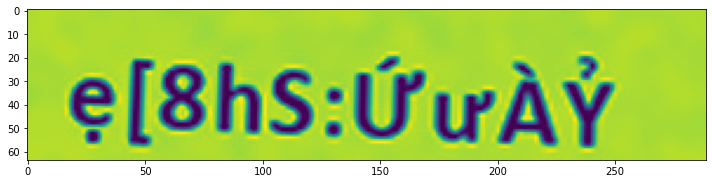

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 10.50]
plt.rcParams["figure.autolayout"] = True
im = plt.imread("ocr_dataset/random/00045131.jpg")
fig, ax = plt.subplots()
im = ax.imshow(im)
plt.show()

In [ ]:
annotation_data = []

In [ ]:
data_dir = Path("./mc_ocr/mcocr_public_train_test_shared_data/mcocr_train_data")

annote_df = pd.read_csv(data_dir /"mcocr_train_df.csv")
annote_df.head()


# s = annote_df.anno_polygons.iloc[0]
# # print(s)
# y = json.loads(s.replace("\'", "\""))
# print(y[0]['category_id'])
annote_df.anno_polygons = annote_df.anno_polygons.str.replace("\'", "\"").apply(json.loads)
# row_0 = annote_df.iloc[0]
# dict_0 = row_0.anno_polygons[0]
# print(dict_0)
for i, row in annote_df.iterrows():
    # read image as RGB and add alpha (transparency)
    im = Image.open(data_dir/ "train_images" / row.img_id).convert("RGBA")

    # convert to numpy (for convenience)
    imArray = np.asarray(im)

    for j, a_dict in enumerate(row.anno_polygons):
        poly = a_dict['segmentation'][0]
        # create mask
        maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
        ImageDraw.Draw(maskIm).polygon(poly, outline=1, fill=1)
        mask = np.array(maskIm)

        # assemble new image (uint8: 0-255)
        newImArray = np.empty(imArray.shape,dtype='uint8')

        # colors (three first columns, RGB)
        newImArray[:,:,:3] = imArray[:,:,:3]

        # transparency (4th column)
        newImArray[:,:,3] = mask*255

        # back to Image from numpy
        newIm = Image.fromarray(newImArray, "RGBA")
        newIm = newIm.crop(newIm.getbbox())

        image_path = data_dir /"cropped"/ str(row.img_id + '_' + str(j) +'.png')
        try:
            newIm.save(image_path)
        except:
            os.mkdir(data_dir/"cropped")
            newIm.save(image_path)
        annotation_data.append(f"{image_path}\t{row.anno_texts.split('|||')[j]}\n")
        # data.append(f"{img_dir_name}/{img_name}\t{labels[img_name]}\n")
# poly_int = np.array([[poly[i], poly[i+1]] for i in range(0, len(poly), 2)], dtype='int32')


In [ ]:
def create_vietocr_annote(img_dir_name, data):
    #read the file
    root = Path("./data/")
    with open(root / img_dir_name / "labels.json") as file:
        labels = json.load(file)
    for img_name in labels:
        data.append(f"{root/ img_dir_name/ img_name}\t{labels[img_name]}\n")


create_vietocr_annote("0916_Data_Samples_2", annotation_data)
create_vietocr_annote("1015_Private_Test", annotation_data)

In [ ]:
for path in Path('./ocr_dataset/').rglob('*.jpg'):
    ann_file = str(path).split(".")[0] + ".txt"
    with open(ann_file) as file:
        annotation_data.append(f"{path}\t{file.readlines()[0]}\n")


In [ ]:
def create_vietocr_dataline(annote_file, annotation_data):
    root = Path("./ocr_dataset/data_line")
    with open(root / annote_file) as f:
        for line in f.readlines():
            annotation_data.append(f"{str(root)}/{line}")

create_vietocr_dataline("test_line_annotation.txt", annotation_data)
create_vietocr_dataline("train_line_annotation.txt", annotation_data)

In [ ]:
# annotation_data[-1]
len(annotation_data)

9668

In [ ]:
for i,s in enumerate(annotation_data):
    s = s.replace("”", "\"")
    s = s.replace("“", "\"")
    s = s.replace("’", "\'")
    s = s.replace("ð", "đ")
    s = s.replace("™", "TM")
    s = s.replace("°", "o")
    s = s.replace("ü", "u")
    s = s.replace("ū", "ũ")
    s = s.replace("—", "-")
    s = s.replace("−", "-")
    s = s.replace("–", "-")
    s = s.replace("²", "2")
    s = s.replace("ā", "ã")
    s = s.replace("Ō", "Õ")
    s = s.replace("Ö", "O")
    s = s.replace("ō", "õ")
    s = s.replace("ö", "o")
    s = s.replace("Ā", "Ã")
    s = s.replace("Ð", "Đ")
    s = s.replace("ū", "ũ")
    s = s.replace("Ū", "Ũ")
    s = s.replace("Ü", "U")
    s = s.replace("€", "C")
    s = s.replace("…", "...")
    annotation_data[i] = s
! rm test_annotation.txt
! rm train_annotation.txt

In [ ]:
# s = annotation_data[0]
# s
for s in annotation_data:
    if "–" in s:
        print(s)

In [ ]:
random.shuffle(annotation_data)
train_test_ratio = 0.7
index = round(len(annotation_data)*train_test_ratio)
print(index)

#write back the file
with open("train_annotation.txt","w") as f:
    f.writelines(annotation_data[:index])
with open("test_annotation.txt","w") as f:
    f.writelines(annotation_data[index:])

6768


# Model exploration

## Transformer

In [ ]:
from torch import nn
from vietocr.tool.translate import translate, process_input
class OCR_Detector(nn.Module):
    def __init__(self, model, image_height = 32, 
                 image_max_width = 512, 
                 image_min_width = 32):
        super(OCR_Detector, self).__init__()
        self.model = model
        self.image_height = image_height
        self.image_max_width = image_max_width
        self.image_min_width = image_min_width
    def forward(self, img):
        # img = process_input(img, self.image_height, self.image_min_width, self.image_max_width)
        return translate(img, self.model)


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

config['weights'] = 'https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj
Downloading...
From: https://drive.google.com/uc?id=1--0gOdyQXIhQArom-bcDE0ZMuUeVvcUj
To: /root/.cache/gdown/tmp5xs1t_wu/dl
100%|██████████| 152M/152M [00:00<00:00, 301

('Ecclesiastics', 0.9300358020342313)


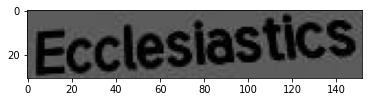

('Viêm da khác', 0.9303997159004211)


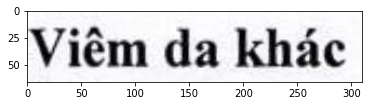

('these have come at a cost of selling land', 0.9288505170403457)


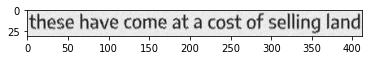

('khởi nghĩa lam sơn gồm ba giai đoạn lớn: hoạt động ở vùng núi thanh hoá (1418-1423)', 0.9306675705565027)


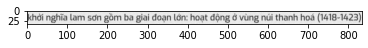

('Nguyễn Thị Hồng Huế', 0.9315074619493986)


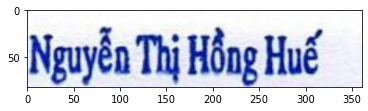

('[22]', 0.9304452985525131)


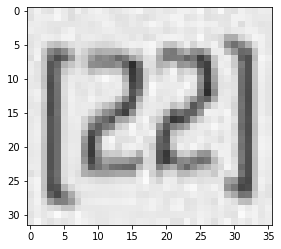

('REAL MADRID BẤT NGỜ ĐƯỢC TRỌNG TÀI CHO HƯỞNG MỘT QUẢ PENALTY GÂY TRANH CÃI', 0.9282361236778466)


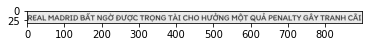

('BSCKII. LƯU CÔNG THÀNH', 0.9284895685586062)


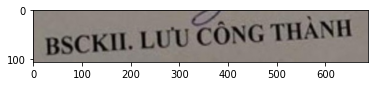

('Liên Hiệp Quốc vừa tuyên bố ngày 19-11 hằng năm là Ngày Toilet Thế giới, bắt đầu từ năm 2013', 0.9292482040498568)


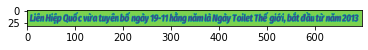

('"Viêm mô tế bào và áp xe của miệng; (Viêm mô tế bào má 2 bên do răng 18,28,38,48 lệch ngầm trong xương)', 0.9276508816237589)


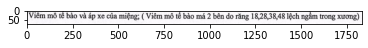

('054', 0.7570826907952627)


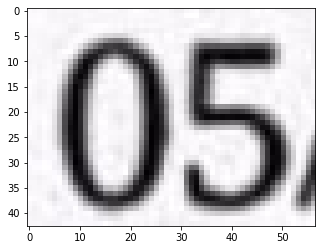

('UNMODIFIED', 0.8532864153385162)


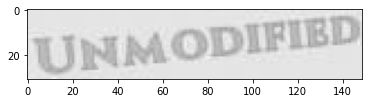

('Thanh Xuân - Hà Nội - Việt Nam', 0.9297198534011841)


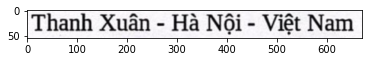

('MONIKER', 0.9023813945906503)


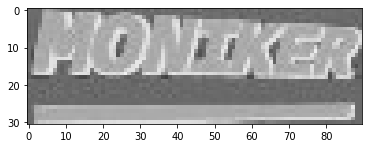

('Repurchases', 0.929177847775546)


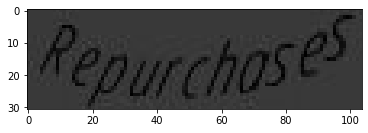

('landladics', 0.8926474928855896)


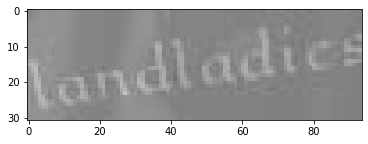

("she more than doubled the party's vote in the constituency", 0.9304317112626701)


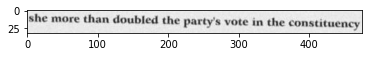

('MINAMA', 0.41387229536970455)


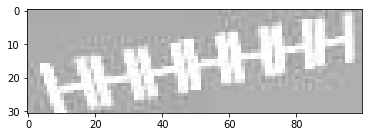

('statuses', 0.9291685447096825)


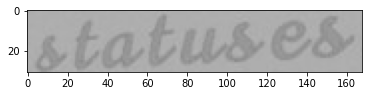

('1.21', 0.9323251098394394)


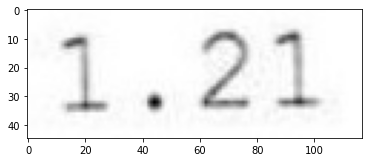

('1.00', 0.9253139346837997)


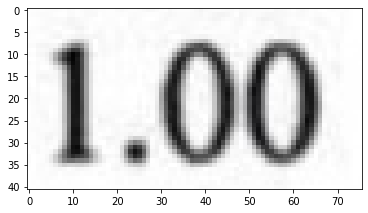

('ngoài ra rất phổ biến các loại rượu ngâm hỗn hợp nhiều loại động', 0.9312557578086853)


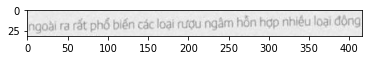

('Sliffiest', 0.8652848535113864)


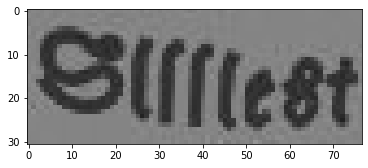

('Psi', 0.9316346844037374)


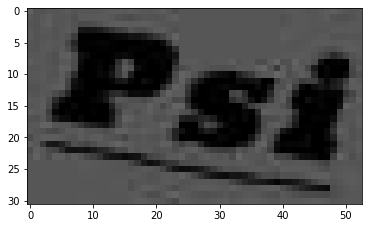

('0', 0.9055541157722473)


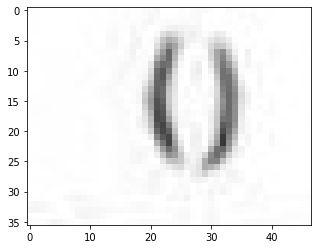

('2006 And Was Featured On Tech News Blog Techcrunch [1]', 0.929099460442861)


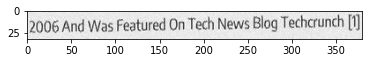

('Trong Đó Có Tổng Binh', 0.9302708080836705)


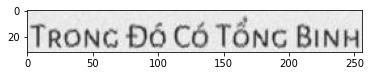

('FRESTORM', 0.8684445470571518)


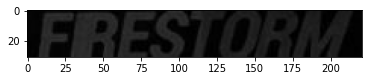

('2,625,400', 0.9229151076740689)


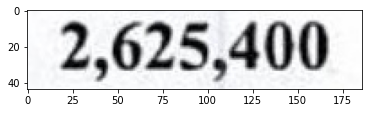

('- Như trên;', 0.8946290097453378)


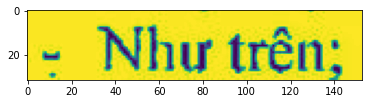

('Quốc Niên: Việt Nam', 0.8505746251658389)


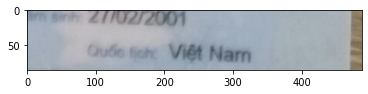

('HOÀNG THỊ NGỌC MAI', 0.9008697172005972)


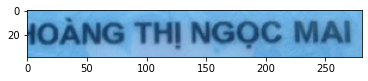

('BẠCH MỸ HẠNH', 0.922883927822113)


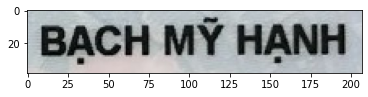

('LÊ VĂN THỨC', 0.9236470352519642)


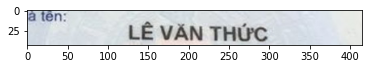

('VŨ THUỲ NINH', 0.886582205692927)


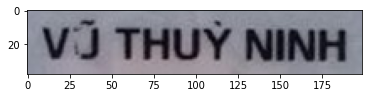

('001085019081', 0.9270240267117819)


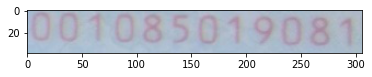

('NGUYỄN THỊ NGOÃN', 0.9280296415090561)


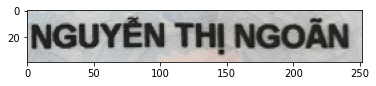

('Tổng tiền thanh thị thị thị thị thị thị thị thị thị thị thị thị thị thị thị thị thị thoi thoi thoi thong thong thị thị thị thị th', 0.378534993460012)


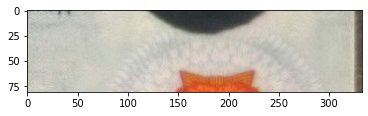

('077078001025', 0.9288353472948074)


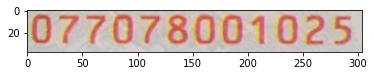

('030068003051', 0.9275925954182943)


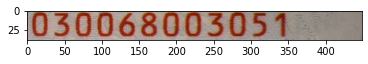

('Số:072077001591', 0.9004940350850423)


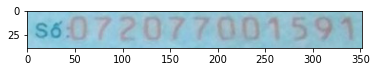

('072084003708', 0.9302747994661331)


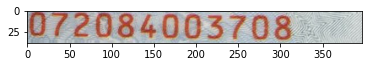

('03620006617', 0.9246428337964144)


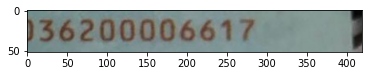

('NGUYỄN HỮU QUANG', 0.9305386766791344)


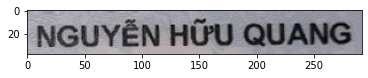

('038071004740', 0.9311937044064204)


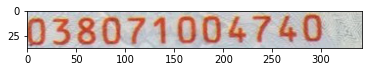

('ĐẶNG TRUNG LÝ', 0.9320028103314913)


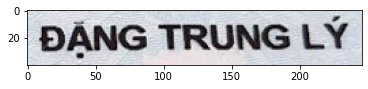

('ĐỖ THỊ ANH', 0.9129226207733154)


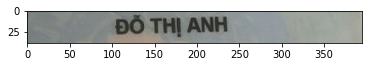

('ĐÔNG HUY THẮNG', 0.8696884193590709)


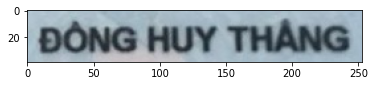

('Số: 072164001745', 0.9163860902190208)


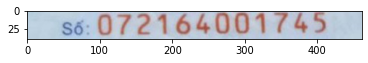

('PHAN THỊ HỒNG THẨM', 0.8825353251563178)


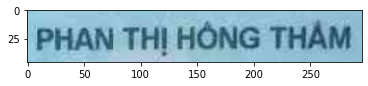

Average inference time:  0.2079412841796875


In [ ]:
infer(detector, "./sample/",["jpg", "jpeg"])

In [ ]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [ ]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                                                           Output Shape              Param #
OCR_Detector                                                                     --                        --
├─VietOCR: 1                                                                     --                        --
│    └─CNN: 2-1                                                                  [256, 4, 256]             --
│    │    └─Vgg: 3-1                                                             [256, 4, 256]             20,166,720
│    └─LanguageTransformer: 2                                                    --                        --
│    │    └─PositionalEncoding: 3-2                                              [256, 4, 256]             --
│    │    └─Transformer: 3-3                                                     --                        17,363,968
│    │    └─Embedding: 3-4                                                       [1, 4, 256]       

## Seq2seq

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')

config['weights'] = 'https://drive.google.com/uc?id=10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ'
config['cnn']['pretrained']=True
config['device'] = 'cuda:0'
config['predictor']['beamsearch']=False

detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ
Downloading...
From: https://drive.google.com/uc?id=10VaduqkmQNf9VegG8wqH1RcYGMkxEcCZ
To: /root/.cache/gdown/tmp2i03uvvw/dl
100%|██████████| 89.6M/89.6M [00:00<00:00, 244MB/s]


In [8]:
detector = Predictor(config2)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /root/.cache/gdown/https-COLON--SLASH--SLASH-drive.google.com-SLASH-uc-QUESTION-id-EQUAL-1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmpv0y951pp/dl
100%|██████████| 89.6M/89.6M [00:00<00:00, 282MB/s]


('tương đã sống lương nghiệm người trong thu trong trong thi thu nguyên nghiệm nghiệm nghiệm nghiệm nghiệm nghiệm nghiệm nghiệm ngh', 0.42141636876865873)


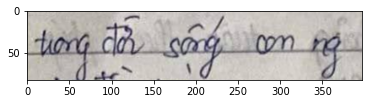

('From A Mare WASS LONE', 0.5540787102211089)


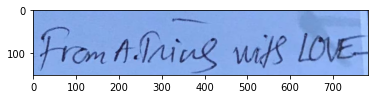

('em cho và luộc hoặc nấu tuượu mận', 0.678134920019092)


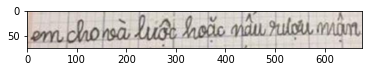

('0010000000000000000000000000000000', 0.1958551757475909)


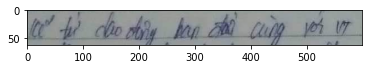

('boy chunh cong thuy', 0.44614910844125244)


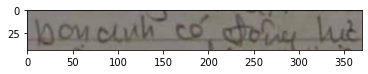

('đó bản của và nhanh thu thi thi thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu t', 0.2603157890975013)


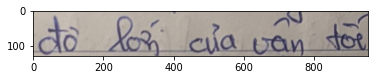

('NGUY CHU SCU SCU THỊ THỊ THỊ THỊ THỊ THỊ HIỆN', 0.3283020113905271)


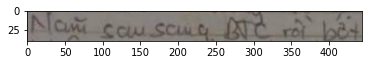

('Pham Ky Duyên', 0.8195152420264024)


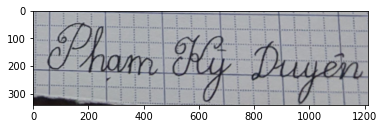

('quốc tan', 0.5904825711622834)


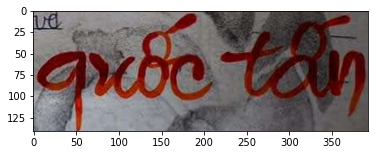

('0121010001011', 0.21265798807144165)


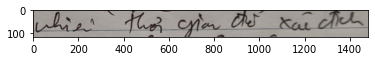

('Giốc tiến tuyển đường và thủ gia thủ giang cho thủ gia thủ gia thủ gia thủ gia thủ gia thủ gia thủ gia thủ gia thủ gia thủ gia th', 0.4193997343265733)


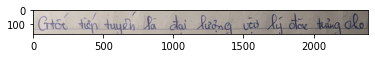

('phá chưng lúc quố nhiều', 0.6487639844417572)


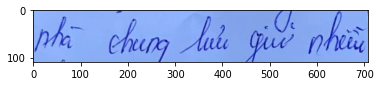

('sinh diệp tring minh đại địa ngày', 0.48218456294500467)


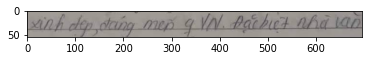

('như nhà văn Nam Cao đả từng', 0.7559941880129002)


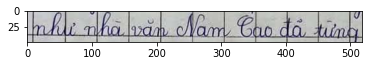

('thà là là nha', 0.27910135972958344)


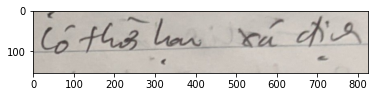

('nhe v', 0.7493523716926574)


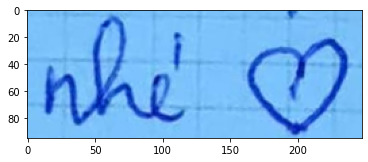

('cho cla sho soing lan', 0.4692300160725911)


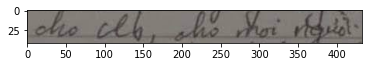

('lồn các phố khi co 1 thười', 0.45339591657886136)


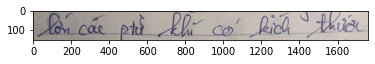

('lướn đoan liên', 0.5548493585416249)


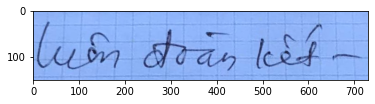

('là những đợp thời thanh xuân', 0.7254913470574788)


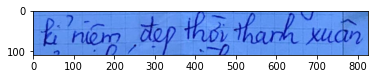

('Hiện Ms', 0.28733271626489504)


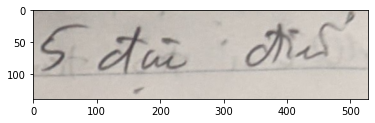

('hiện thức khủng khiến đó năm 1945', 0.7148757739500566)


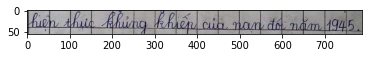

('Ciểu học Câm Bon', 0.5828929685521871)


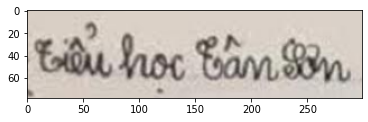

('Biển kiện tình học', 0.5171444432602988)


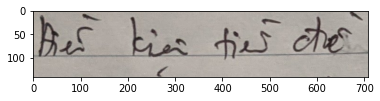

('Canh cho những ước mới Ating', 0.7115768838141646)


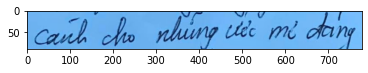

('lần mành và con giúp', 0.7534569337964058)


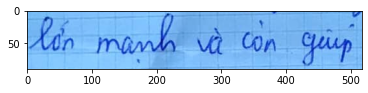

('0000000000000000000000000', 0.20123885869979857)


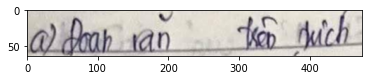

('Chật vây', 0.6590034831315279)


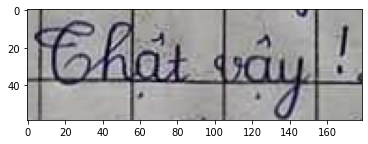

('Đa Di phả phương oá', 0.45415791869163513)


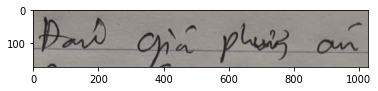

('theo leo thuy chung và y chong hoà mục', 0.6318509268917536)


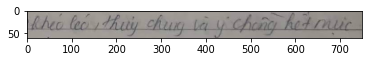

('Cong doramarb và', 0.5956829804927111)


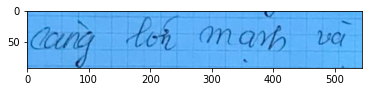

('cho được vền thi tiết phả', 0.5069242444634438)


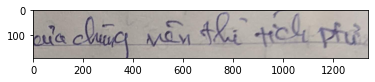

('Cam đn SEC đi', 0.5511960089206696)


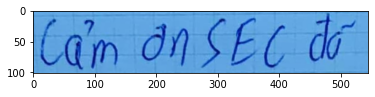

('Em hay giải Hinh Nam Chung', 0.5949372159173856)


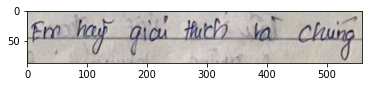

('Tap con lị trương', 0.5240795011906063)


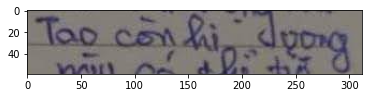

('vào mát làm cườ chyến đội ly', 0.539428881103439)


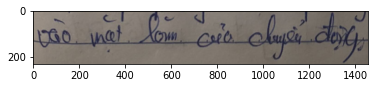

('Chí bảng mát của và ngai nhanh ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha ngai nha', 0.30279447790957237)


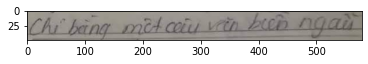

('00 Giáng Thi Tháng Pháng Pháng Pháng Pháp Thi Thi Pháp Pháp Thi Thi Pháp Pháp Thi Thi Pháp Pháp Thi Thi Pháp Pháp Thi Thi Pháp Ph', 0.3197318167071934)


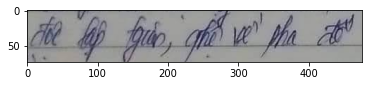

('NGUY THỊ THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU THU ', 0.2851257568528486)


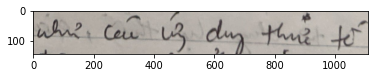

('Năm nay con 10 tưới', 0.6057919295210588)


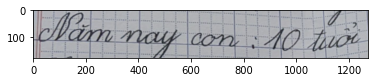

('trong cức Lược lập là the thị tri thị tri thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi thi', 0.2548874625286391)


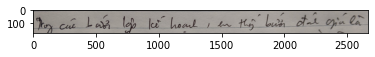

('Vi du vh phi viên bải bai số', 0.3941040832017149)


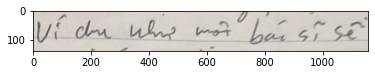

('Sống thật hanh phui', 0.8250300648965334)


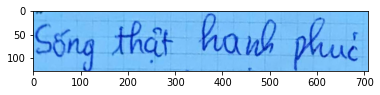

('Biên bường đông tràng điểm điểm điểm the trang điểm điểm điểm the the trong điểm điểm điểm the the the the the the the the the th', 0.3151982445125432)


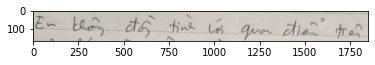

('MÀY THƯỜNG THỊ THỊ THỊ HIỆN THỊ HIỆN THỊ HIỆN THỊ HIỆN', 0.35392498845855397)


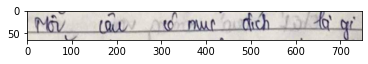

('XUÂN CỦA TÔI', 0.668867057810227)


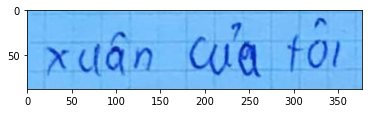

('nguồi bậy đại lưu', 0.6757368778481203)


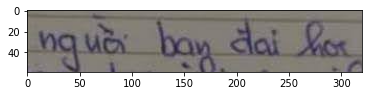

('Vây điều gì đã khiến cho mối tác nhâm bất tứ', 0.713672629811547)


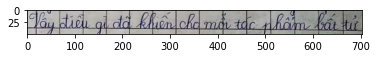

('chỉ mong by tuy tế may học', 0.6775623330703149)


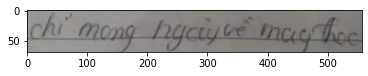

('Phạ? Thành Khi', 0.5991867285753999)


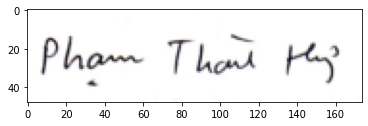

('Những sinh nhiệt sec', 0.6439672142267228)


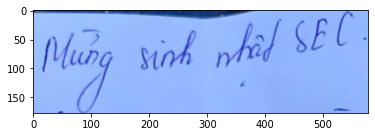

('giai thích', 0.7196316540241241)


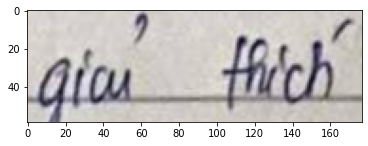

('Hoa phường đã chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến chiến c', 0.2961179785026136)


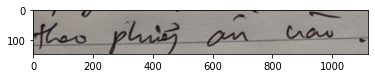

('Caxzi', 0.5537063837051391)


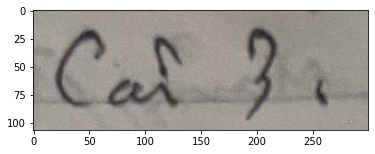

('Đề bài Hầy vất một toan vớn tả nhi một cơn nật mà', 0.6729163878730365)


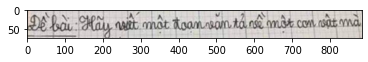

('Sinh viên cic callin', 0.6714851379394531)


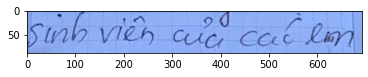

('trở thanh mô phần thanh', 0.7454377995884937)


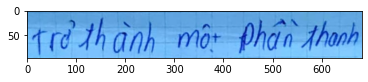

('theng tây trị cả vấp ugan dagh th', 0.487300704600233)


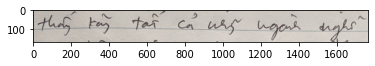

('Ước 10 năm Squ', 0.7658284668411527)


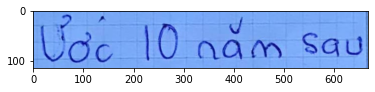

('SW HO THU CHU CHU ĐÀI THI THI THUY', 0.3023167625069618)


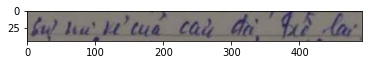

('Tay nhiều đó thành may mày', 0.5229236664107213)


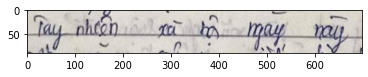

('phot', 0.3905588425695896)


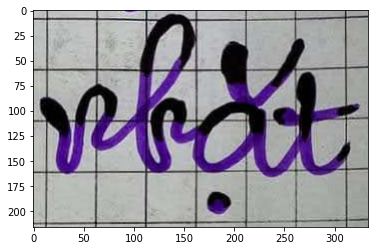

('quảng đường chuyển động', 0.8250978005969006)


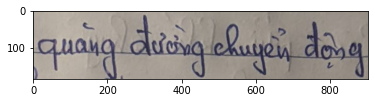

('Viên hoc và Trung co', 0.5961651213467121)


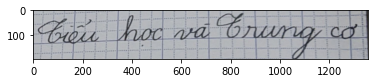

('Chin địa cai luu ràng', 0.44945166260004044)


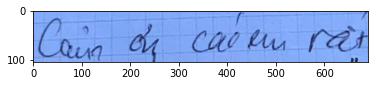

('Cam ôn mội người đã', 0.7325271979758614)


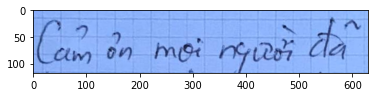

('Cam ôn câu vi đã luôn', 0.7199459444908869)


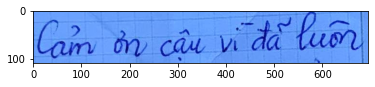

('một chến nghiệp trong thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp thuy nghiệp', 0.2816594965005106)


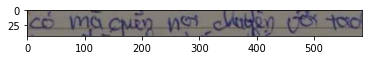

('safter ppaa triều', 0.4333522148868617)


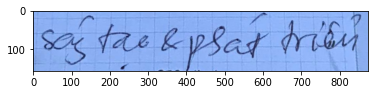

('SEC rất hanh phú', 0.7134880432859063)


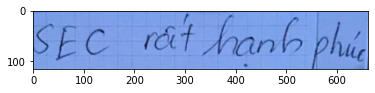

('Cac em', 0.7619815319776535)


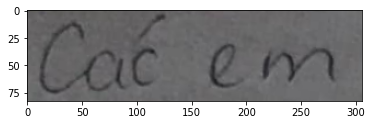

('Gia tôi pháp tuyển', 0.7118664280407958)


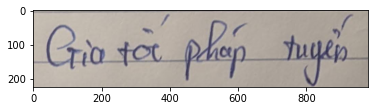

('Số ghết minh vi', 0.5696762358148892)


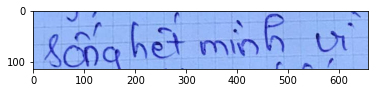

('chuộc bao lau thi trong phai tam dan nhau', 0.5078218201311623)


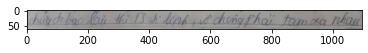

('TA Hữ Tính nhi bay', 0.4977160257597764)


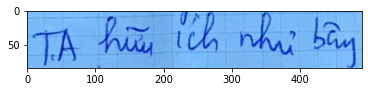

('Một những đông đã gia đây đây hang', 0.5981640765333877)


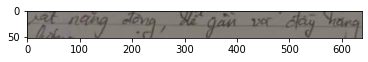

('CLB bong trung try thu', 0.4831856394355947)


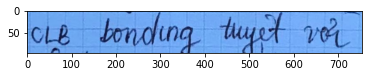

('Cn tập', 0.4638870880007744)


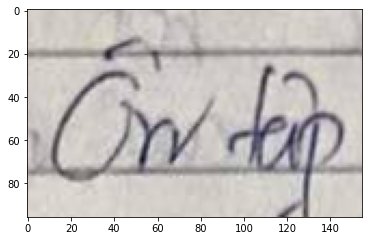

('Monq cac lm luốn hp', 0.6104121655225754)


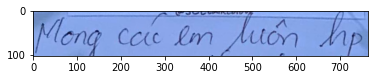

('XUY THO SECHONS', 0.3295048922300339)


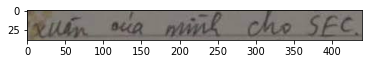

('bảo me em chiếu nay làm ti chó đi', 0.7542415247722105)


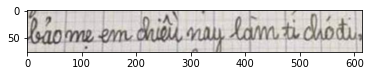

('coy viel có quy trình ughies ugit', 0.6028826336065928)


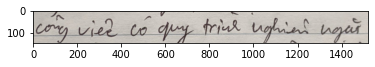

('Ngho thuật không phải làng lưa dối.', 0.745625661952155)


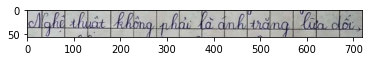

('Gim thi thi thi thi thi thi tho sa', 0.2761698124163291)


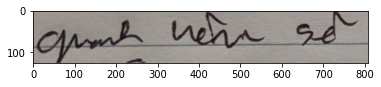

('Vi Thệ Hàng', 0.7042920386249368)


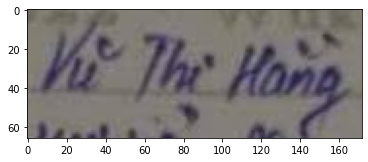

('khi trị thanh một phần', 0.7297933440316807)


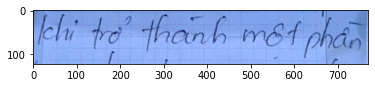

('Xức Chủ Số Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việt Việ', 0.3888647485264512)


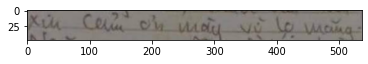

('Phụ gho viên thành thi', 0.4331366926092993)


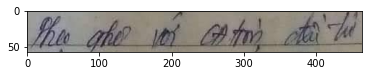

('Sach lày ?', 0.6056952193379402)


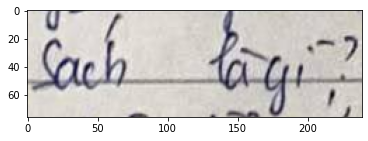

('0010000000000000', 0.17693091230466962)


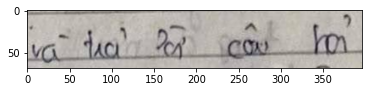

('11 nam lới 1 tgiau laf chi', 0.5755013181613042)


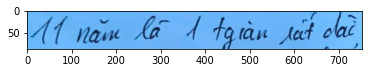

('YEUGDSEC', 0.5617720242589712)


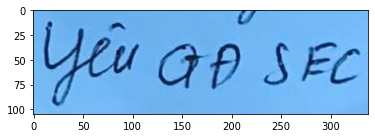

('Cầu 10: Nêu năm', 0.5915398041407267)


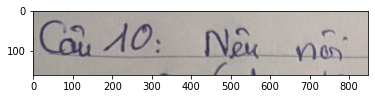

('tuyết với tháy', 0.6334851820554052)


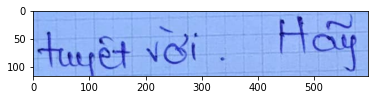

('ba gia việt và tri tiến thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thiết thi', 0.26040640115275865)


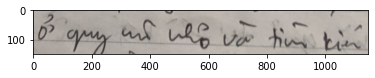

('gay quý để giày hóp', 0.6609907722786853)


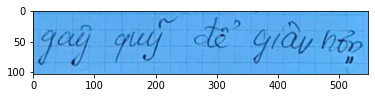

('đó mp tương quản được điểm được điểm được điểm được điểm được điểm được điểm được điểm được điểm được điểm được điểm được điểm đư', 0.3894744295366975)


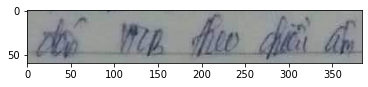

('dương lai trường bang van', 0.5627943629026413)


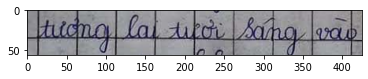

('Phập gia một đại thi thi', 0.3911664439365268)


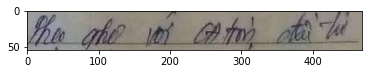

('Mở bài', 0.7501231779654821)


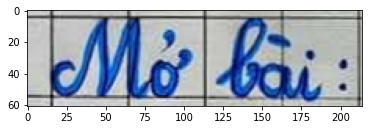

('quả phi trong thọc tiếp', 0.5497676769028539)


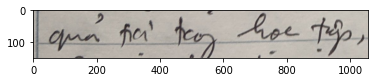

('thôu một ba điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện điện đi', 0.3729048635839492)


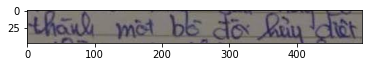

('mưi yếu sectry', 0.41390401710356983)


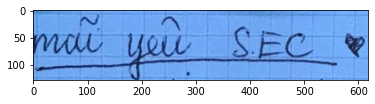

('Cac luc ra mu', 0.40647866748846495)


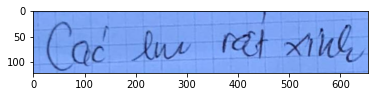

('Mom nay con đã thả', 0.7669832102126546)


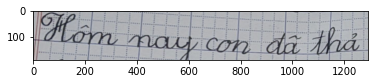

('phụ hugah lên gipper', 0.7229328252375126)


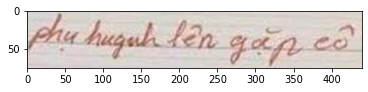

('Dang', 0.6479617580771446)


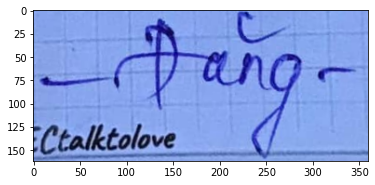

('bib viện V0 nam nha', 0.49030028558091115)


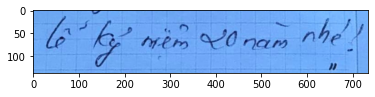

('CHUNNERS', 0.3167986273765564)


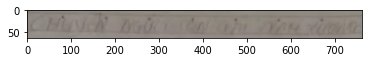

('Liêu chiếu thi thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu thu th', 0.24134796817404355)


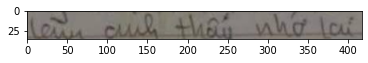

('nhỏ hiện pháp nam lan', 0.4202945775219372)


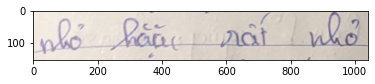

('khi nó co bịch thười', 0.4737427156418562)


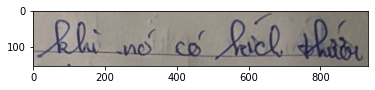

('tười dep trong cuộc de', 0.7648566900329157)


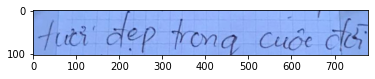

('bai phả liên chị chí các mội', 0.46997137061719385)


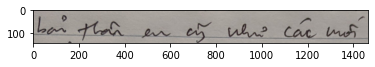

('Mai bô cơn nhâu cho ng', 0.718704039400274)


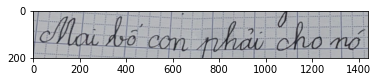

('trước ở bac biện', 0.391672789119184)


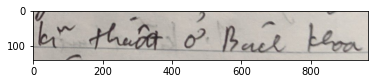

('linh gia việt nhiệu đó số là có', 0.45010382850323954)


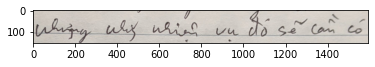

('SEC sê ngày tăng', 0.6325473473407328)


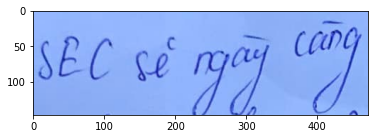

('Số thể bảquy', 0.48650260890523594)


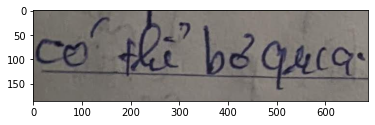

('Cập làm văn', 0.6889671900055625)


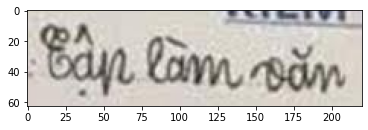

('giáu Y nghia nhan viện', 0.4944287308237769)


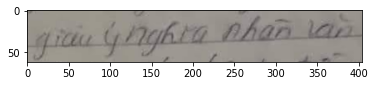

('đười hà được phương thành', 0.5605342066287995)


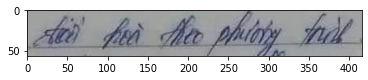

('Phiến Hiện Trường Han Nhưng Như chiến như chiến như chiến như chiến như chiến như chiến như chiến như chiến như chiến như chiến n', 0.28525074103543924)


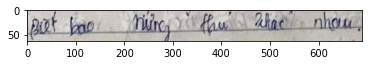

('Vù A - Mm', 0.39033616582552594)


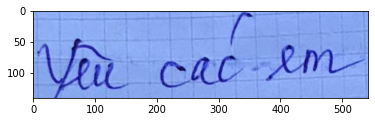

('Vượt quy những song gia', 0.7427395135164261)


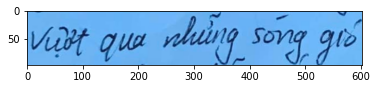

('mong trong số quon', 0.6559971761372354)


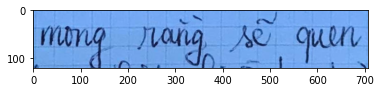

('thành trong trương được chính chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chiếu chi', 0.3651405768107998)


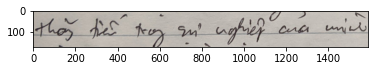

('Vhân Cai Cầu chủ', 0.5826187282800674)


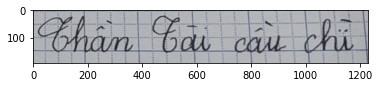

('Công hiên 1 phan thanh xia', 0.6999358933132428)


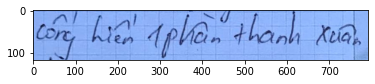

('Cô goữ Hà Dùng nhi liệ', 0.5059964101422917)


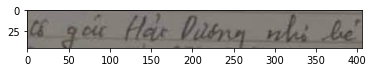

('Chương loàn mot nam trong minh thuy nghiệp trong trong minh minh', 0.3970684972591698)


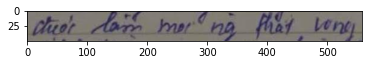

('Chung hước tân đầu', 0.4598670009937551)


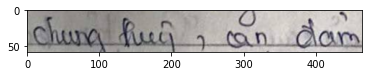

('nhất là con cho', 0.8616775949796041)


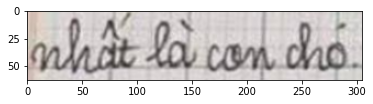

('Gii Lùy được', 0.36552270750204724)


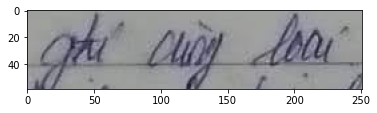

('đo và dà giải', 0.4742067123834903)


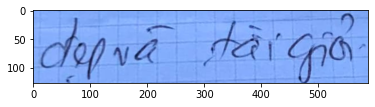

('lam dn va', 0.7580943935447269)


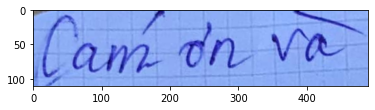

('hắng tranh tiên trung bình', 0.6307610562787607)


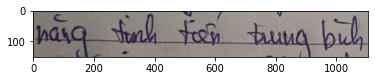

('Nhông những em thích mà bố km', 0.7124919341555958)


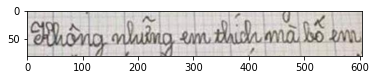

('Nong gia Tu Tu Tu', 0.36145682457615347)


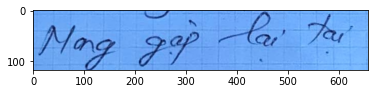

('là mái nhà ôm ấp nhưng', 0.8117598525502465)


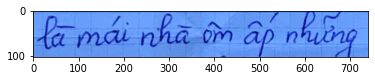

('du hành vuật qua mội sự bằng hoà gian với', 0.6667387481869721)


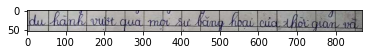

('nhang lường thi tiếng pháp pháp', 0.4734198463059241)


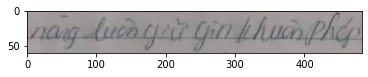

('loài đâu phả thu gian sat', 0.5672471672296524)


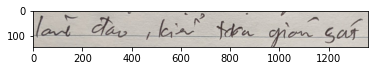

('được đại chảt chiến', 0.40834185716352966)


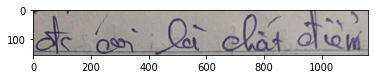

('Phá có Lon Tai Lan Lan', 0.3430706557225097)


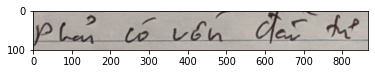

('là đại cham theo thê gicua', 0.6192910682696563)


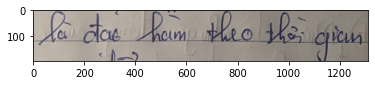

('là và vh vi viên trị com', 0.4198601031675935)


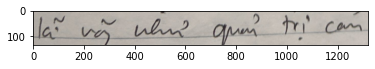

('Bộ quyph điện thanh chong', 0.5181771719455719)


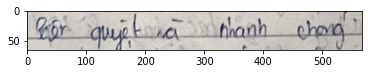

('đay việt hà thu nghi một một nhưng', 0.3553019352257252)


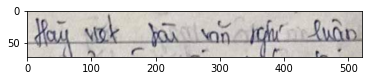

('thị phi thuy thien vào', 0.4359095526689833)


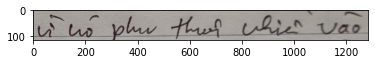

('Một vật độ loc trà chất được', 0.5623092049998897)


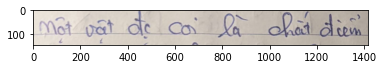

('lêm là thịo lới môn', 0.508707766862292)


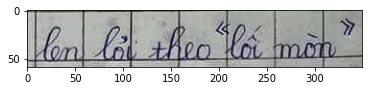

('Các phủ chu chuyển động', 0.6258329588757909)


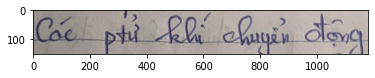

('khá định có thi thu kinh việt điệu thu nguy', 0.3580790155155714)


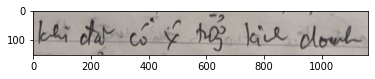

('thất qua vô vau', 0.8350391983985901)


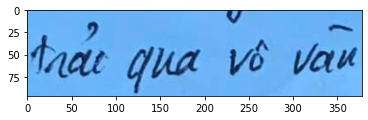

('Rat nhuu', 0.5628965012729168)


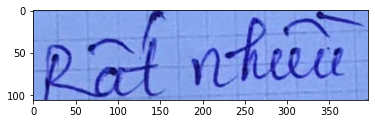

('Vunh Vũng Việt Như Thu Thu Thu Nghe Phey', 0.33054847102612256)


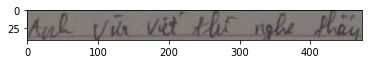

('Phương Hipp', 0.6499414772472598)


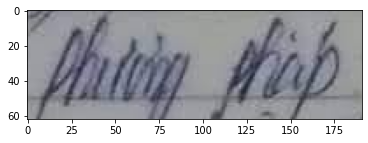

('đó lườy được', 0.5829086800416311)


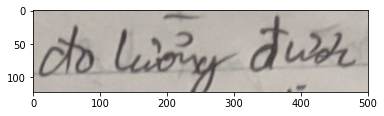

('Có nhiều cập lo thiệt', 0.5000779972899527)


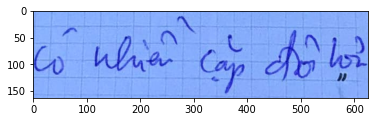

('ngay Cang phot Hiện', 0.6683097073906347)


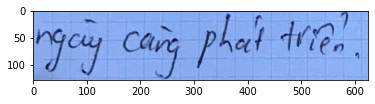

('Chưa Chạn loang nước đó điển thu trong được điện thu thi thu nghiệp sau nghiệp sau nghiệp sau nghiệp sau nghiệp sau nghiệp sau ng', 0.4024114146135574)


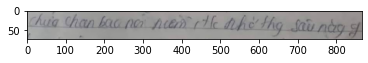

('mong CLB ngay', 0.712442105779281)


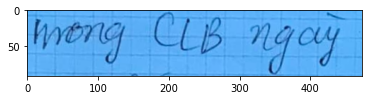

('trước thu chinh chung', 0.3278184362820217)


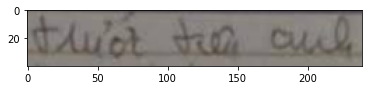

Average inference time:  0.06887989800150801


In [11]:
infer(detector, "./test-data/handwriting-Photos-001/extracted",["png"])

In [ ]:
infer(detector, "./sample/",["jpg", "jpeg"])

In [ ]:
detector.model

VietOCR(
  (cnn): CNN(
    (model): Vgg(
      (features): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): AvgPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0)
        (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (9): ReLU(inplace=True)
        (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (12): ReLU(inplace=True)
        (13): AvgPool2d(kernel_size=[

In [ ]:
from torchinfo import summary
summary(OCR_Detector(detector.model), (4,3,32,512))

Layer (type:depth-idx)                        Output Shape              Param #
OCR_Detector                                  --                        --
├─VietOCR: 1-1                                --                        --
│    └─CNN: 2-1                               [256, 4, 256]             --
│    │    └─Vgg: 3-1                          [256, 4, 256]             20,166,720
│    └─Seq2Seq: 2-2                           --                        --
│    │    └─Encoder: 3-2                      [256, 4, 512]             920,832
│    │    └─Decoder: 3-3                      [4, 233]                  1,283,561
│    │    └─Decoder: 3-4                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-5                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-6                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-7                      [4, 233]                  (recursive)
│    │    └─Decoder: 3-8               

# Train model

## Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


### Config 1: Transformer

In [4]:
config = Cfg.load_config_from_name('vgg_transformer')
config2 = Cfg.load_config_from_name('vgg_seq2seq')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR/"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

trainer_params = {
        'batch_size': 32,
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'/content/drive/MyDrive/checkpoint/transformerocr_checkpoint2.pth',    
          'export':'/content/drive/MyDrive/weights/transformerocr2.pth',
          'metrics': 1000
         }
optimizer_params = {'max_lr': 0.0003}

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config['trainer'].update(trainer_params)
config['optimizer'].update(optimizer_params)
config['dataset'].update(dataset_params)
config['dataloader'].update(dataloader_params)
config['device'] = 'cuda'

you can change any of these params in this full list below

In [ ]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': '/content/drive/MyDrive/weights/transformerocr2.pth',
  'checkpoint': '/content/drive/MyDrive/checkpoint/transformerocr_checkpoint2.pth',
  'log': './train.log',
  'metrics': 1000},
 'dataset': {'name': 'hw',
  'data_root': '/content/Vietnamese-HTR/',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt',
  

### Config 2: Seq2seq

In [6]:
# config['vocab'] = 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

root = "/content/Vietnamese-HTR"
dataset_params = {
    'name':'hw',
    'data_root': root,
    'train_annotation':'train_annotation.txt',
    'valid_annotation':'test_annotation.txt'
}

params = {
         'print_every':200,
         'valid_every':15*200,
          'iters':30000,
          'checkpoint':'/content/drive/MyDrive/checkpoint/seq2seqocr_checkpoint.pth',    
          'export':'/content/drive/MyDrive/weights/seq2seqocr.pth',
          'metrics': 10000
         }

dataloader_params = {'num_workers': 2, 'pin_memory': True}
config2['trainer'].update(params)
config2['dataset'].update(dataset_params)
config2['dataloader'].update(dataloader_params)
config2['device'] = 'cuda'

In [7]:
config2

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 30000,
  'export': '/content/drive/MyDrive/weights/seq2seqocr.pth',
  'checkpoint': '/content/drive/MyDrive/checkpoint/seq2seqocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000},
 'dataset': {'name': 'hw',
  'data_root': '/content/Vietnamese-HTR',
  'train_annotation': 'train_annotation.txt',
  'valid_annotation': 'test_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image_max_width': 512},
 'dataloade

## Training
You should train model from our pretrained 

In [ ]:
!rm -rf train_hw
!rm -rf valid_hw
trainer = Trainer(config2, pretrained=True)
trainer.config.save('config.yml')

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Cached Downloading: /tmp/tranformerorc.pth
Downloading...
From: https://drive.google.com/uc?id=1nTKlEog9YFK74kPyX0qLwCWi60_YHHk4
To: /root/.cache/gdown/tmp1vb_7bs2/dl
100%|██████████| 89.6M/89.6M [00:02<00:00, 37.5MB/s]


Computing MD5: /tmp/tranformerorc.pth
MD5 matches: /tmp/tranformerorc.pth


Create train_hw: 100%|█████████████████████████████████████████| 6768/6768 [00:14<00:00, 453.57it/s]


Created dataset with 6767 samples


Create valid_hw: 100%|█████████████████████████████████████████| 2900/2900 [00:06<00:00, 467.89it/s]


Created dataset with 2899 samples


valid_hw build cluster: 100%|████████████████████████████████| 2899/2899 [00:00<00:00, 94557.84it/s]


Visualize your dataset to check data augmentation is appropriate

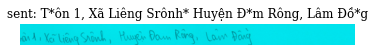

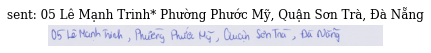

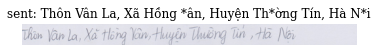

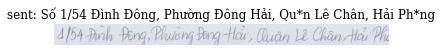

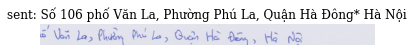

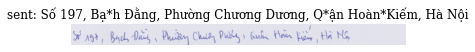

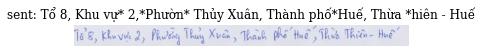

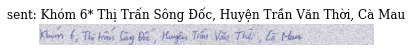

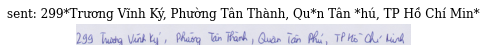

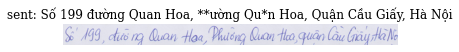

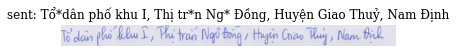

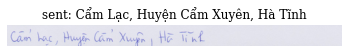

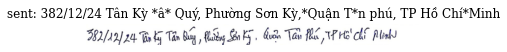

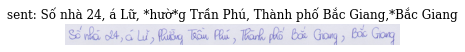

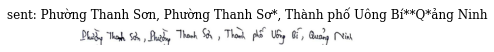

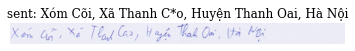

In [ ]:
trainer.visualize_dataset()

In [ ]:
trainer.load_checkpoint("/content/drive/MyDrive/checkpoint/seq2seqocr_checkpoint.pth")

Train now

In [ ]:
trainer.train()

iter: 003200 - train loss: 0.858 - lr: 1.00e-03 - load time: 4.38 - gpu time: 129.34
iter: 003400 - train loss: 0.847 - lr: 9.99e-04 - load time: 3.15 - gpu time: 126.05
iter: 003600 - train loss: 0.830 - lr: 9.99e-04 - load time: 3.03 - gpu time: 126.90
iter: 003800 - train loss: 0.830 - lr: 9.98e-04 - load time: 2.73 - gpu time: 127.38
iter: 004000 - train loss: 0.825 - lr: 9.97e-04 - load time: 2.77 - gpu time: 124.61
iter: 004200 - train loss: 0.816 - lr: 9.95e-04 - load time: 2.05 - gpu time: 126.34
iter: 004400 - train loss: 0.816 - lr: 9.93e-04 - load time: 2.45 - gpu time: 125.77
iter: 004600 - train loss: 0.807 - lr: 9.91e-04 - load time: 2.66 - gpu time: 122.24
iter: 004800 - train loss: 0.815 - lr: 9.89e-04 - load time: 2.00 - gpu time: 128.46
iter: 005000 - train loss: 0.796 - lr: 9.87e-04 - load time: 3.15 - gpu time: 121.56
iter: 005200 - train loss: 0.797 - lr: 9.84e-04 - load time: 2.54 - gpu time: 126.48
iter: 005400 - train loss: 0.787 - lr: 9.81e-04 - load time: 2.68

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()

{'acc_full': 0.011402027027027027,
 'acc_per_char': 0.39223236,
 'wer': tensor(0.5511),
 'cer': tensor(0.2421)}